## 1. Importar la data y explorar la data 

In [5]:
import pandas as pd
import os

ruta_data = "../Data"

# Facebook
facebook_df = pd.read_json(os.path.join(ruta_data, "Facebook_data.json"))

# Instagram
instagram_df = pd.read_json(os.path.join(ruta_data, "Instagram_data.json"))

#  Twitter
twitter_df = pd.read_json(os.path.join(ruta_data, "Twitter_data.json"))



facebook_df['plataforma'] = 'Facebook'
instagram_df['plataforma'] = 'Instagram'
twitter_df['plataforma'] = 'Twitter'

facebook_df['retweets'] = None
facebook_df['respuestas'] = None

instagram_df['compartidos'] = None
instagram_df['retweets'] = None
instagram_df['respuestas'] = None

twitter_df['comentarios'] = None
twitter_df['compartidos'] = None

df_redes = pd.concat([facebook_df, instagram_df, twitter_df], ignore_index=True)
df_redes['fecha'] = pd.to_datetime(df_redes['fecha'])
df_redes.head(5)



,id,usuario,fecha,contenido,likes,comentarios,compartidos,plataforma,retweets,respuestas
0,1,usuario1,2025-09-19,"Una experiencia maravillosa, muy satisfecho. #...",79,87,26,Facebook,None,None
1,2,usuario2,2025-09-05,El peor servicio que he recibido. #colera,341,98,7,Facebook,None,None
2,3,usuario3,2025-03-13,"Este servicio es excelente, estoy muy satisfec...",144,25,41,Facebook,None,None
3,4,usuario4,2025-07-28,No puedo creer lo mal que funciona esto. #colera,366,41,37,Facebook,None,None
4,5,usuario5,2025-05-14,"Esto es increible, estoy extasiado! #extasis",451,4,31,Facebook,None,None


In [61]:
publicaciones_por_red = df_redes['plataforma'].value_counts().reset_index()
publicaciones_por_red.columns = ['Plataforma', 'Cantidad de publicaciones']
display(publicaciones_por_red)

,Plataforma,Cantidad de publicaciones
0,Facebook,900
1,Instagram,900
2,Twitter,900


In [ ]:
# Promedio de likes (Instagram tiene mas likes en promedio)
likes_promedio_general = (
    df_redes.groupby('plataforma')['likes']
    .mean()
    .reset_index()
    .rename(columns={'likes': 'Likes promedio'})
)

# Mostrar tabla
display(likes_promedio_general)


,plataforma,Likes promedio
0,Facebook,245.033333
1,Instagram,503.008889
2,Twitter,249.370000


In [62]:
likes_promedio = (
    df_redes.groupby(['anio_mes', 'plataforma'])['likes']
    .mean()
    .reset_index()
    .rename(columns={'anio_mes': 'Mes', 'likes': 'Likes promedio', 'plataforma': 'Plataforma'})
)
display(likes_promedio)


,Mes,Plataforma,Likes promedio
0,2025-01,Facebook,243.174419
1,2025-01,Instagram,450.780488
2,2025-01,Twitter,247.977778
3,2025-02,Facebook,244.789474
4,2025-02,Instagram,553.014085
5,2025-02,Twitter,246.403226
6,2025-03,Facebook,254.147059
7,2025-03,Instagram,490.062500
8,2025-03,Twitter,255.661538
9,2025-04,Facebook,245.226667


In [6]:
# Verificamos si hay textos faltantes
faltantes = df_redes['contenido'].isnull().sum()
print(f"Cantidad de textos faltantes: {faltantes}")

Cantidad de textos faltantes: 0


## 2. Preprocesamiento de textos

En esta sección se realiza el preprocesamiento necesario para preparar el texto para el análisis. Las tareas incluyen:
- Normalización del texto (minúsculas y eliminación de símbolos innecesarios)
- Tokenización
- Lematización
- Eliminación de stop words
- Manejo de datos faltantes


In [10]:
import sys
sys.path.append('../Scripts')

from procesamiento_texto import limpiar_y_tokenizar

df_redes['tokens'] = df_redes['contenido'].apply(limpiar_y_tokenizar)
df_redes[['contenido', 'tokens']].head()


,contenido,tokens
0,"Una experiencia maravillosa, muy satisfecho. #...","[experiencia, maravillosa, satisfecho, #, sati..."
1,El peor servicio que he recibido. #colera,"[peor, servicio, recibido, #, colera]"
2,"Este servicio es excelente, estoy muy satisfec...","[servicio, excelente, satisfecho, #, satisfacc..."
3,No puedo creer lo mal que funciona esto. #colera,"[puedo, creer, mal, funciona, #, colera]"
4,"Esto es increible, estoy extasiado! #extasis","[increible, extasiado, #, extasis]"


In [ ]:
df_redes['longitud'] = df_redes['tokens'].apply(len)
df_redes

In [14]:
df_redes['longitud'] = df_redes['tokens'].apply(len)

print("Promedio de palabras por publicación:", df_redes['longitud'].mean())
print("Publicación más corta (tokens):", df_redes['longitud'].min())
print("Publicación más larga (tokens):", df_redes['longitud'].max())



Promedio de palabras por publicación: 5.228148148148148
Publicación más corta (tokens): 4
Publicación más larga (tokens): 7


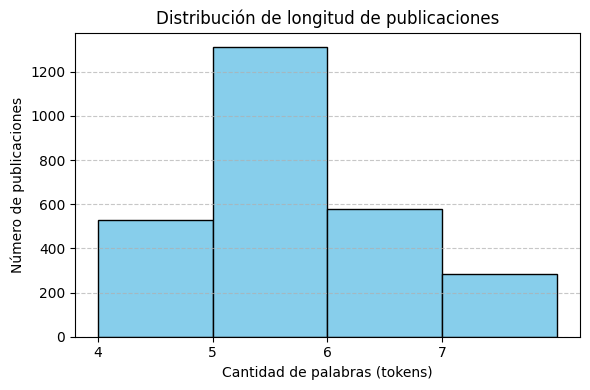

In [28]:
import matplotlib.pyplot as plt

# Histograma de la longitud de publicaciones
plt.figure(figsize=(6, 4))
plt.hist(df_redes['longitud'], bins=range(df_redes['longitud'].min(), df_redes['longitud'].max() + 2),
         color='skyblue', edgecolor='black')
plt.title("Distribución de longitud de publicaciones")
plt.xlabel("Cantidad de palabras (tokens)")
plt.ylabel("Número de publicaciones")
plt.xticks(range(df_redes['longitud'].min(), df_redes['longitud'].max() + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('../Outputs/histograma_longitud.jpg')
plt.show()



## 3. Análisis Exploratorio

En este paso se exploran los textos para identificar:
- Las palabras más frecuentes.
- Hashtags más utilizados.
- N-gramas (combinaciones de palabras comunes).
- Distribución de longitud de textos.


### 3.1 – Palabras más frecuentes

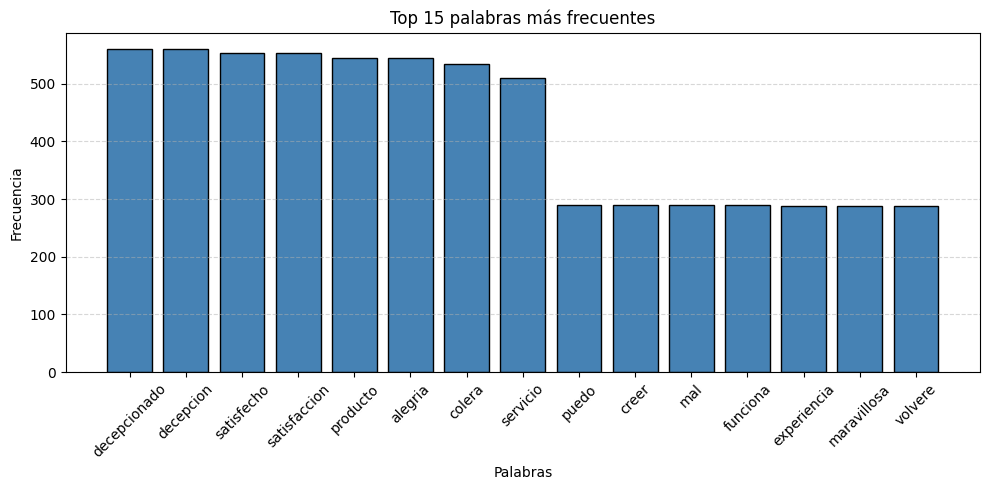

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

todas_las_palabras = sum(df_redes['tokens'], [])

# Filtrar palabras vacías o no deseadas
palabras_filtradas = [p for p in todas_las_palabras if p.strip() and p != '#']

# frecuency
frecuencia_palabras = Counter(palabras_filtradas).most_common(15)

palabras, cantidades = zip(*frecuencia_palabras)
#barras 
plt.figure(figsize=(10, 5))
plt.bar(palabras, cantidades, color='steelblue', edgecolor='black')
plt.title("Top 15 palabras más frecuentes")
plt.xlabel("Palabras")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('../Outputs/top_palabras.png', dpi=300) 
plt.show()



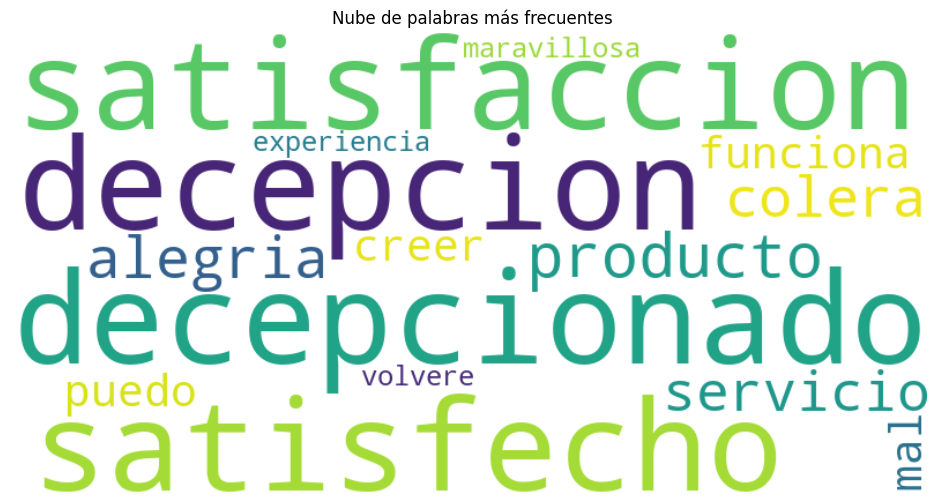

In [29]:
from wordcloud import WordCloud

# Crear un diccionario con las frecuencias para WordCloud
frecuencia_dict = dict(frecuencia_palabras)
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    prefer_horizontal=0.9
).generate_from_frequencies(frecuencia_dict)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de palabras más frecuentes")
plt.savefig('../Outputs/wordcloud_palabras.png')
plt.show()



### 3.2 – Hashtags más frecuentes

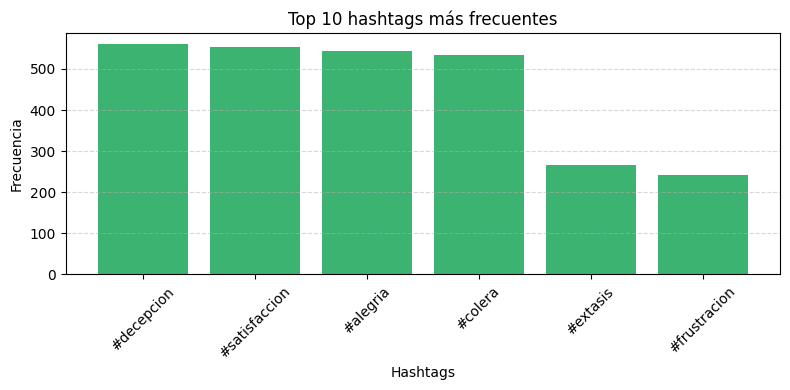

In [31]:
import re

# hashtags directamente desde la columna 'contenido'
def extraer_hashtags(texto):
    if not isinstance(texto, str):
        return []
    return re.findall(r"#\w+", texto)

df_redes['hashtags'] = df_redes['contenido'].apply(extraer_hashtags)
todos_los_hashtags = sum(df_redes['hashtags'], [])
frecuencia_hashtags = Counter(todos_los_hashtags).most_common(10)

hashtags, cantidades = zip(*frecuencia_hashtags)

# Visualización
plt.figure(figsize=(8, 4))
plt.bar(hashtags, cantidades, color='mediumseagreen')
plt.title("Top 10 hashtags más frecuentes")
plt.xlabel("Hashtags")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('../Outputs/#tops.png')
plt.show()


### 3.3 – N-gramas (Bigramas y trigramas)

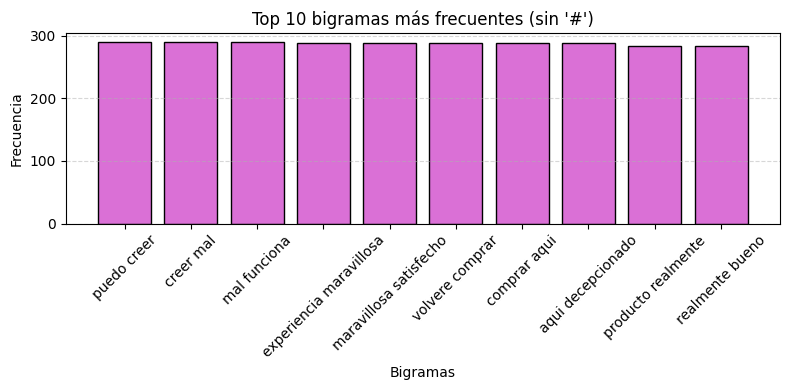

In [38]:
from nltk.util import ngrams
from itertools import chain
from collections import Counter
import matplotlib.pyplot as plt

# Función para generar n-gramas
def generar_ngrams(lista_tokens, n):
    return list(ngrams(lista_tokens, n))

# Generar todos los bigramas
todos_bigrama = list(chain.from_iterable(
    df_redes['tokens'].apply(lambda x: generar_ngrams(x, 2))
))

# 🔹 Filtrar bigramas que NO contengan "#"
todos_bigrama_filtrados = [
    bigrama for bigrama in todos_bigrama
    if '#' not in bigrama and '' not in bigrama
]

# Contar los bigramas más frecuentes
frecuencia_bigrama = Counter(todos_bigrama_filtrados).most_common(10)

# Convertir a texto para graficar
bigrama_texto = [' '.join(b) for b, _ in frecuencia_bigrama]
frecuencias = [f for _, f in frecuencia_bigrama]

# Graficar
plt.figure(figsize=(8, 4))
plt.bar(bigrama_texto, frecuencias, color='orchid', edgecolor='black')
plt.title("Top 10 bigramas más frecuentes (sin '#')")
plt.xlabel("Bigramas")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('../Outputs/top_bigramas.png', dpi=300)
plt.show()


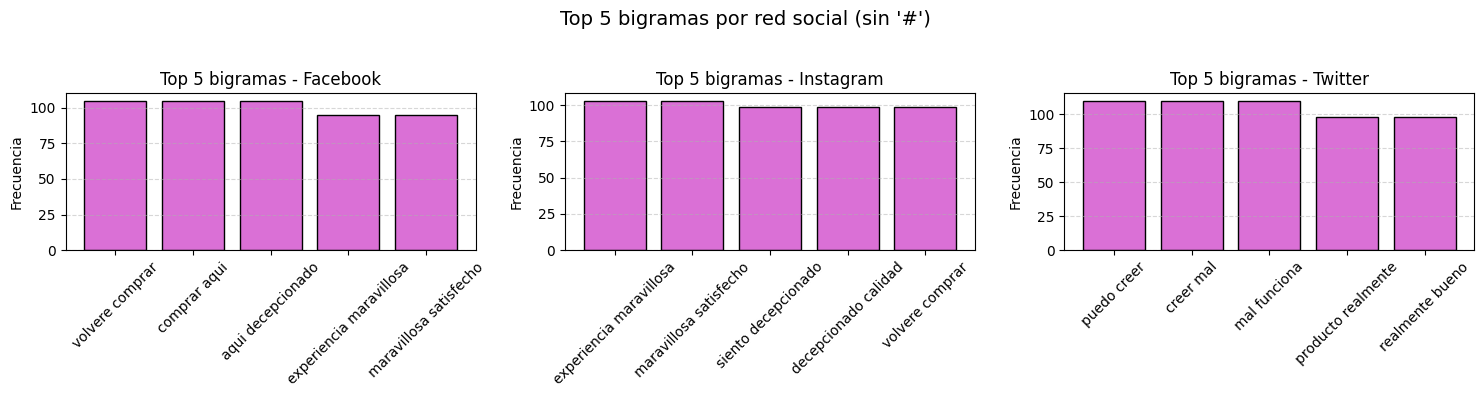

In [ ]:
# bigramas por cada red social

plataformas = df_redes['plataforma'].unique()

# Crear una figura general con subplots
plt.figure(figsize=(15, 4))

for i, plataforma in enumerate(plataformas, 1):
    # Filtrar por red social
    df_filtrado = df_redes[df_redes['plataforma'] == plataforma]
    
    # Generar todos los bigramas
    bigramas = list(chain.from_iterable(
        df_filtrado['tokens'].apply(lambda x: generar_ngrams(x, 2))
    ))

    # Filtrar bigramas que NO contengan "#" ni estén vacíos
    bigramas_filtrados = [
        b for b in bigramas
        if '#' not in b and '' not in b
    ]

    # Contar bigramas más frecuentes
    top_bigramas = Counter(bigramas_filtrados).most_common(5)
    bigramas_texto = [' '.join(b) for b, _ in top_bigramas]
    frecuencias = [f for _, f in top_bigramas]

    # Subplot para cada red social
    plt.subplot(1, len(plataformas), i)
    plt.bar(bigramas_texto, frecuencias, color='orchid', edgecolor='black')
    plt.title(f"Top 5 bigramas - {plataforma}")
    plt.xticks(rotation=45)
    plt.ylabel("Frecuencia")
    plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.suptitle("Top 5 bigramas por red social (sin '#')", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('../Outputs/top_bigramas_por_red.png', dpi=300)
plt.show()


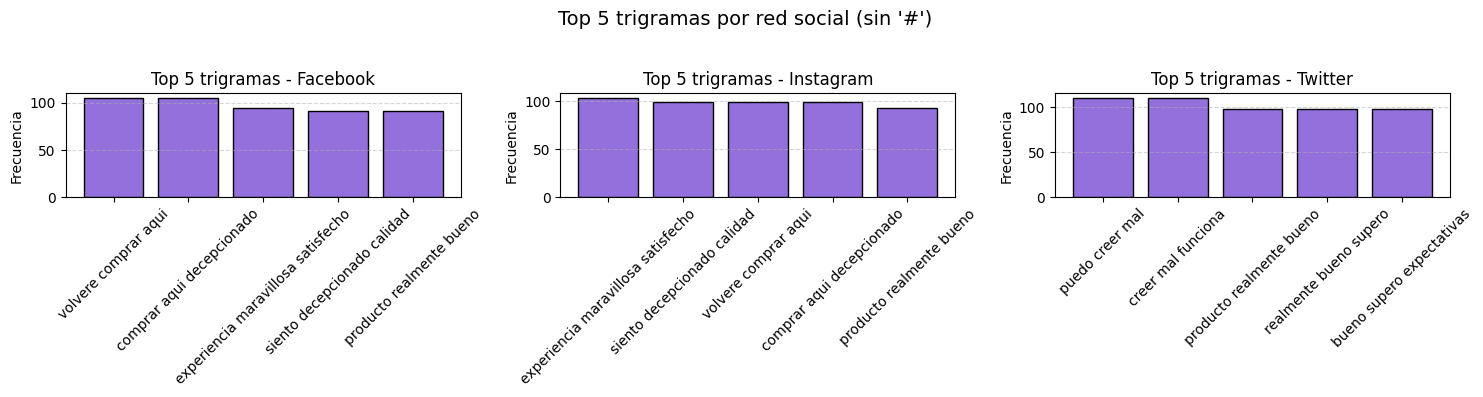

In [40]:
# Trigrama por red social
plt.figure(figsize=(15, 4))

for i, plataforma in enumerate(plataformas, 1):
    # Filtrar los datos por red social
    df_filtrado = df_redes[df_redes['plataforma'] == plataforma]

    # Generar trigramas por publicación
    trigramas = list(chain.from_iterable(
        df_filtrado['tokens'].apply(lambda x: generar_ngrams(x, 3))
    ))

    # Filtrar trigramas que no tengan '#' ni tokens vacíos
    trigramas_filtrados = [
        t for t in trigramas
        if '#' not in t and '' not in t
    ]

    # Contar trigramas más frecuentes
    top_trigramas = Counter(trigramas_filtrados).most_common(5)
    trigramas_texto = [' '.join(t) for t, _ in top_trigramas]
    frecuencias = [f for _, f in top_trigramas]

    # Subplot para cada red social
    plt.subplot(1, len(plataformas), i)
    plt.bar(trigramas_texto, frecuencias, color='mediumpurple', edgecolor='black')
    plt.title(f"Top 5 trigramas - {plataforma}")
    plt.xticks(rotation=45)
    plt.ylabel("Frecuencia")
    plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.suptitle("Top 5 trigramas por red social (sin '#')", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('../Outputs/top_trigramas_por_red.png', dpi=300)
plt.show()


### 3.4 – Distribución de longitud de publicaciones

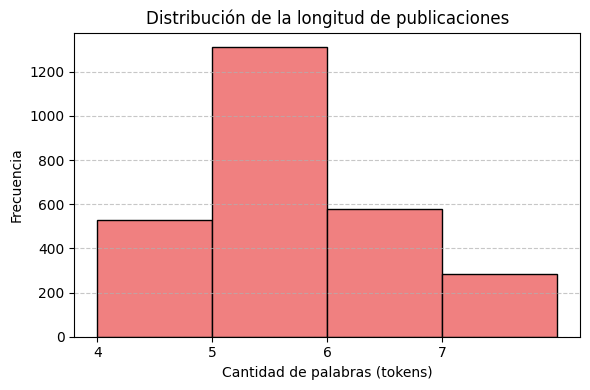

In [33]:
plt.figure(figsize=(6, 4))
plt.hist(df_redes['longitud'], bins=range(df_redes['longitud'].min(), df_redes['longitud'].max()+2),
         color='lightcoral', edgecolor='black')
plt.title("Distribución de la longitud de publicaciones")
plt.xlabel("Cantidad de palabras (tokens)")
plt.ylabel("Frecuencia")
plt.xticks(range(df_redes['longitud'].min(), df_redes['longitud'].max()+1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## 4. Análisis de Sentimientos

Se implementa un modelo preentrenado multilingüe (BERT) para evaluar el sentimiento de las publicaciones en redes sociales. Se asignan puntuaciones del 1 (muy negativo) al 5 (muy positivo).


In [41]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline

# Cargr el modelo
modelo = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(modelo)
modelo_sentimiento = AutoModelForSequenceClassification.from_pretrained(modelo)

# Crear el pipeline de análisis de sentimientos
clasificador = pipeline("sentiment-analysis", model=modelo_sentimiento, tokenizer=tokenizer)


Device set to use cpu


In [42]:
# Función que recibe un texto y devuelve puntuación (1 a 5)
def obtener_sentimiento(texto):
    try:
        resultado = clasificador(texto[:512])[0]  
        etiqueta = resultado['label']  # '5 stars'
        puntuacion = int(etiqueta[0])  # Extraemos el número
        return puntuacion
    except:
        return None  

df_redes['sentimiento'] = df_redes['contenido'].apply(obtener_sentimiento)


In [45]:
# funcion para clasificador
def clasificar_sentimiento(puntuacion):
    if puntuacion in [4, 5]:
        return 'positivo'
    elif puntuacion == 3:
        return 'neutral'
    elif puntuacion in [1, 2]:
        return 'negativo'
    else:
        return 'indefinido'

df_redes['clasificacion'] = df_redes['sentimiento'].apply(clasificar_sentimiento)


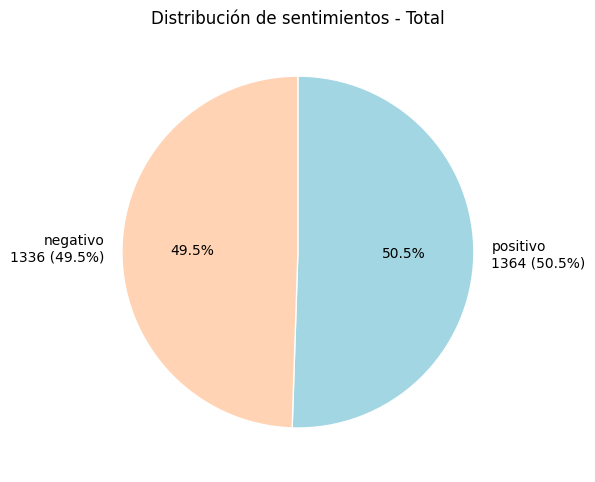

In [ ]:
import matplotlib.pyplot as plt

conteo = df_redes['clasificacion'].value_counts()

# Ordenar 
orden_deseado = ['positivo', 'neutral', 'negativo']
conteo = conteo.reindex([c for c in orden_deseado if c in conteo.index])

total = conteo.sum()

#  con número y porcentaje
etiquetas = [f"{clasif}\n{num} ({num/total:.1%})" for clasif, num in conteo.items()]

# Paleta 
colores = ['#A1D6E2', '#FFD3B4', '#FFAAA5'][:len(conteo)]  

# Gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(
    conteo,
    labels=etiquetas,
    colors=colores,
    startangle=90,
    counterclock=False,
    autopct='%1.1f%%',
    wedgeprops={'edgecolor': 'white'}
)
plt.title("Distribución de sentimientos - Total")
plt.tight_layout()
plt.savefig('../Outputs/sentimientos_total_pastel.png', dpi=300)
plt.show()


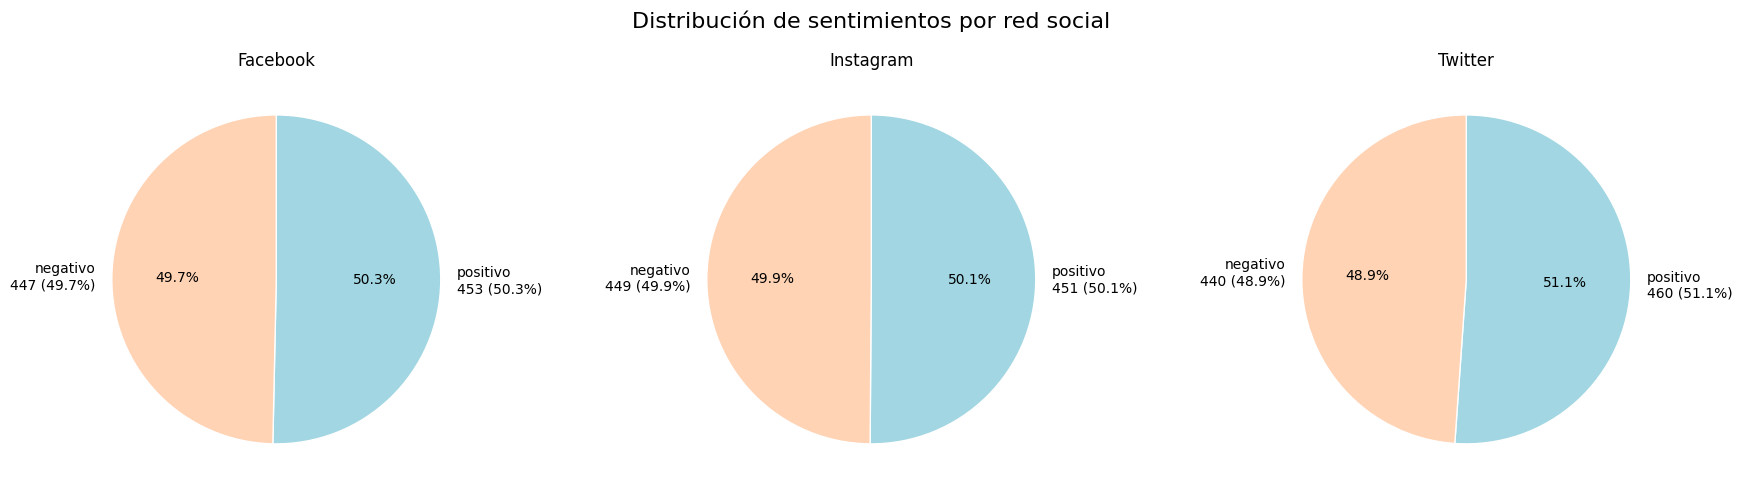

In [ ]:
# Obtener las plataformas únicas
plataformas = df_redes['plataforma'].unique()

# Crear subplots
fig, axs = plt.subplots(1, len(plataformas), figsize=(6 * len(plataformas), 5))

for i, plataforma in enumerate(plataformas):
    # por red social 
    subset = df_redes[df_redes['plataforma'] == plataforma]
    conteo = subset['clasificacion'].value_counts()
    
    total = conteo.sum()
    etiquetas = [f"{c}\n{n} ({n/total:.1%})" for c, n in conteo.items()]
    colores = ['#A1D6E2', '#FFD3B4', '#FFAAA5'][:len(conteo)]
    
    axs[i].pie(
        conteo,
        labels=etiquetas,
        colors=colores,
        startangle=90,
        counterclock=False,
        autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'white'}
    )
    axs[i].set_title(f"{plataforma}")

plt.suptitle("Distribución de sentimientos por red social", fontsize=16)
plt.tight_layout()
plt.savefig('../Outputs/sentimientos_pie_por_red.png', dpi=300)
plt.show()


## 5: Detección de Tendencias.

In [52]:
# fecha
df_redes['fecha'] = pd.to_datetime(df_redes['fecha'])

# ano-mes para periodo
df_redes['anio_mes'] = df_redes['fecha'].dt.to_period('M').astype(str)


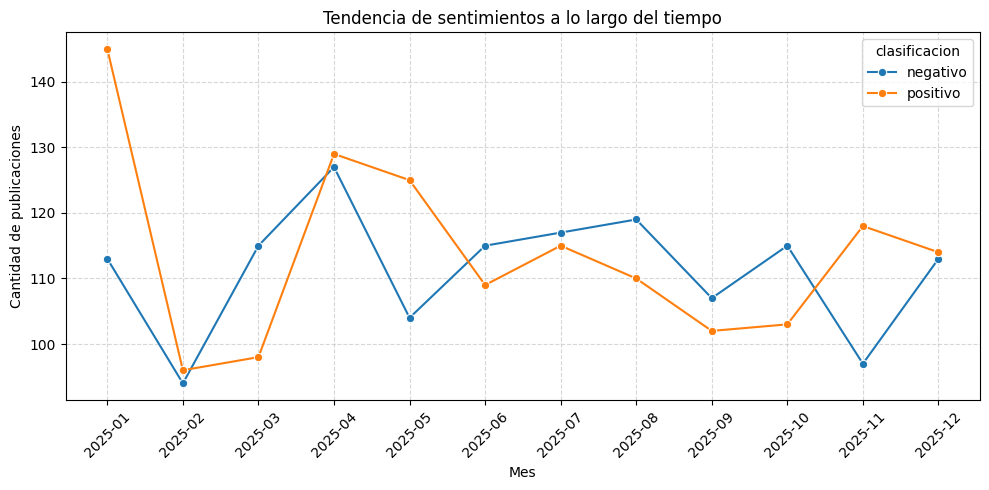

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tendencia mensual por sentimiento
tendencia_mensual = df_redes.groupby(['anio_mes', 'clasificacion']).size().reset_index(name='cuenta')

plt.figure(figsize=(10, 5))
sns.lineplot(data=tendencia_mensual, x='anio_mes', y='cuenta', hue='clasificacion', marker='o')
plt.title("Tendencia de sentimientos a lo largo del tiempo")
plt.xlabel("Mes")
plt.ylabel("Cantidad de publicaciones")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('../Outputs/tendencia_sentimientos_mensual.png', dpi=300)
plt.show()


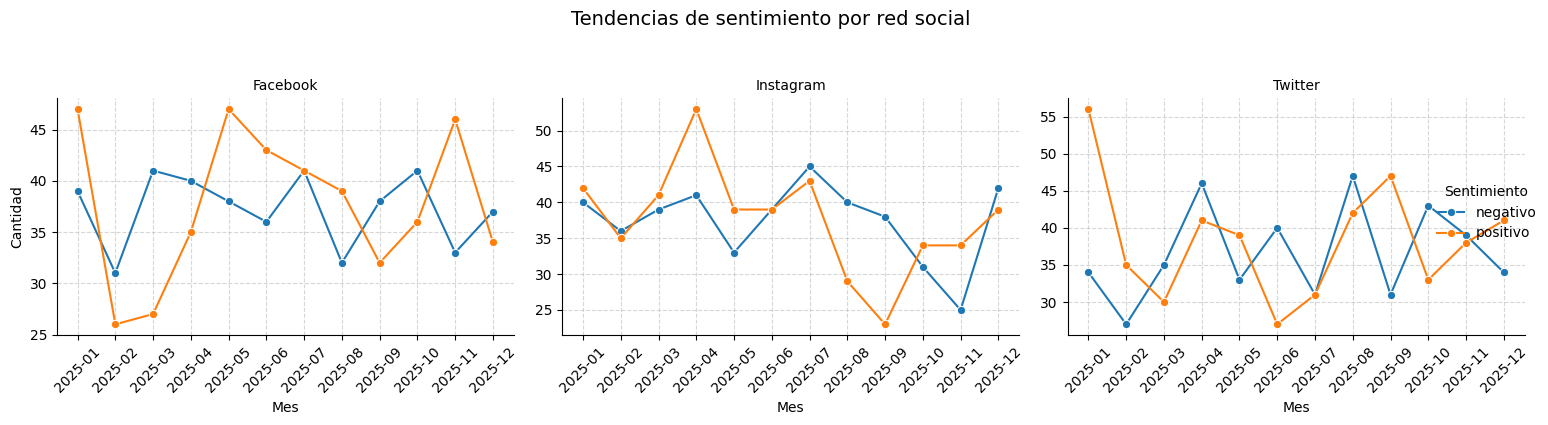

In [54]:
# Agrupar por plataforma, mes y sentimiento
tendencia_por_red = df_redes.groupby(['plataforma', 'anio_mes', 'clasificacion']).size().reset_index(name='cuenta')

# Crear gráfico separado por red social
g = sns.FacetGrid(tendencia_por_red, col='plataforma', hue='clasificacion', height=4, aspect=1.2, sharey=False)
g.map_dataframe(sns.lineplot, x='anio_mes', y='cuenta', marker='o')
g.add_legend(title='Sentimiento')
g.set_titles("{col_name}")
g.set_axis_labels("Mes", "Cantidad")
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, linestyle='--', alpha=0.5)

plt.suptitle("Tendencias de sentimiento por red social", y=1.05, fontsize=14)
plt.tight_layout()
plt.savefig('../Outputs/tendencia_sentimientos_por_red.png', dpi=300)
plt.show()


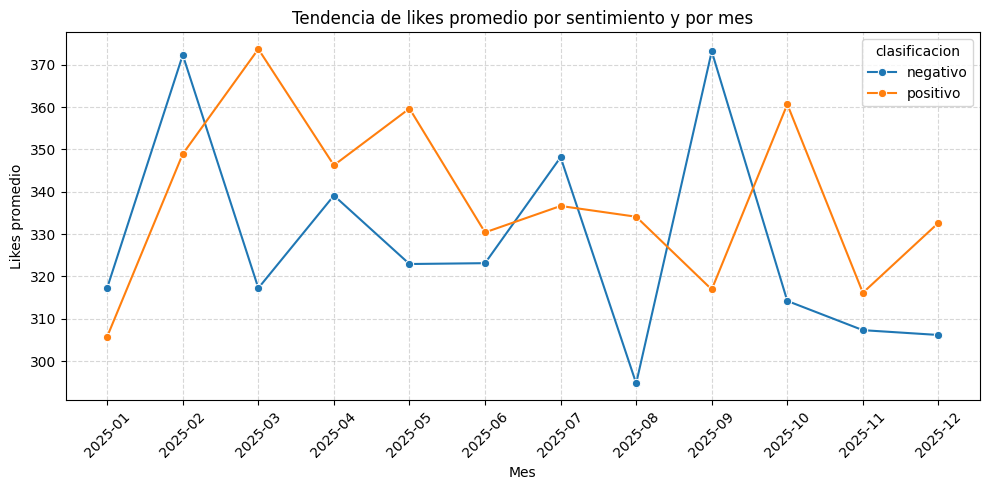

In [ ]:
# tendencia por red social por primedio de likes 
likes_por_sentimiento = (
    df_redes.groupby(['anio_mes', 'clasificacion'])['likes']
    .mean()
    .reset_index()
)

# Gráfico de líneas
plt.figure(figsize=(10, 5))
sns.lineplot(data=likes_por_sentimiento, x='anio_mes', y='likes', hue='clasificacion', marker='o')
plt.title("Tendencia de likes promedio por sentimiento y por mes")
plt.xlabel("Mes")
plt.ylabel("Likes promedio")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('../Outputs/tendencia_likes_por_sentimiento.png', dpi=300)
plt.show()


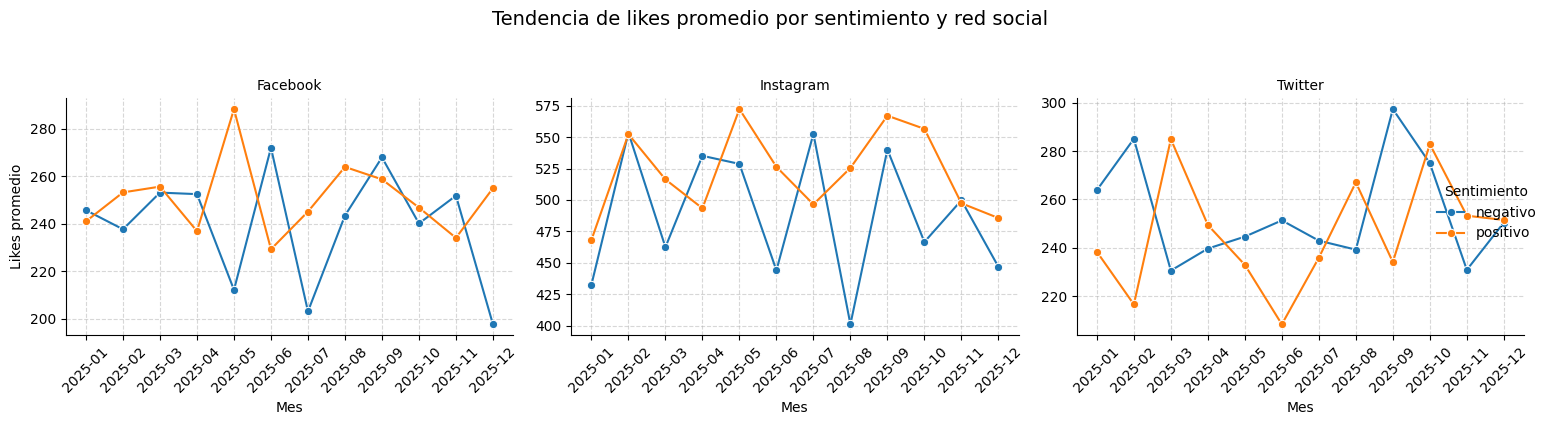

In [57]:
# tendencia  por plataforma, mes y sentimiento, calcular promedio de likes
likes_por_red_sentimiento = (
    df_redes.groupby(['plataforma', 'anio_mes', 'clasificacion'])['likes']
    .mean()
    .reset_index()
)

# Crear gráfico con paneles por red social
g = sns.FacetGrid(likes_por_red_sentimiento, col='plataforma', hue='clasificacion', height=4, aspect=1.2, sharey=False)
g.map_dataframe(sns.lineplot, x='anio_mes', y='likes', marker='o')
g.add_legend(title='Sentimiento')
g.set_titles("{col_name}")
g.set_axis_labels("Mes", "Likes promedio")
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, linestyle='--', alpha=0.5)

plt.suptitle("Tendencia de likes promedio por sentimiento y red social", y=1.05, fontsize=14)
plt.tight_layout()
plt.savefig('../Outputs/likes_promedio_por_red_y_sentimiento.png', dpi=300)
plt.show()


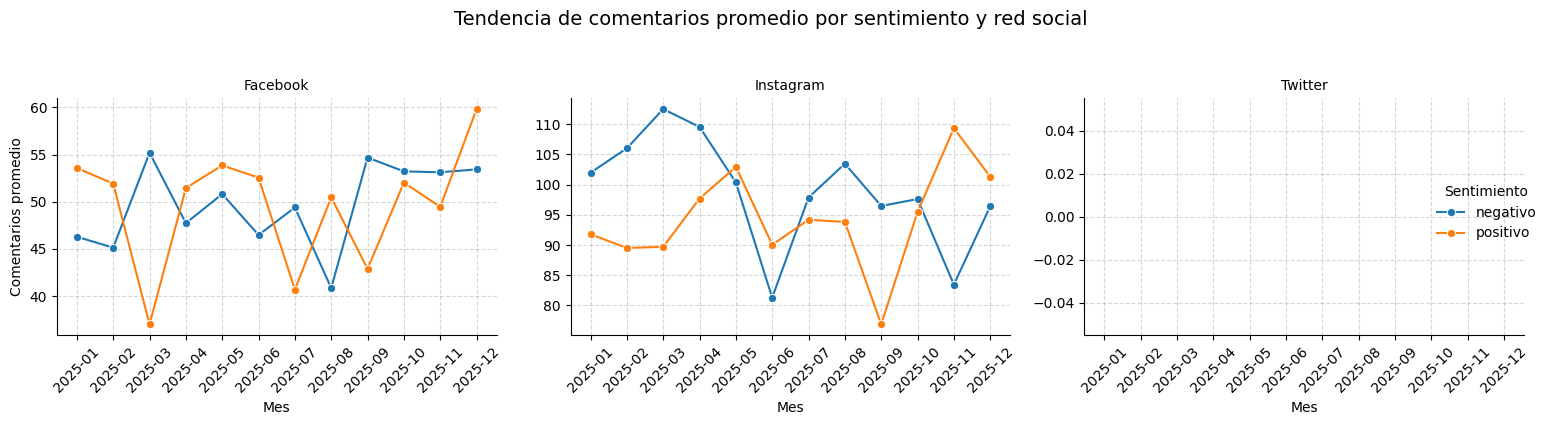

In [58]:
# Agrupar por plataforma, mes y sentimiento, calcular promedio de comentarios
comentarios_por_red_sentimiento = (
    df_redes.groupby(['plataforma', 'anio_mes', 'clasificacion'])['comentarios']
    .mean()
    .reset_index()
)

# Crear gráfico con paneles por red social
g = sns.FacetGrid(comentarios_por_red_sentimiento, col='plataforma', hue='clasificacion', height=4, aspect=1.2, sharey=False)
g.map_dataframe(sns.lineplot, x='anio_mes', y='comentarios', marker='o')
g.add_legend(title='Sentimiento')
g.set_titles("{col_name}")
g.set_axis_labels("Mes", "Comentarios promedio")
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, linestyle='--', alpha=0.5)

plt.suptitle("Tendencia de comentarios promedio por sentimiento y red social", y=1.05, fontsize=14)
plt.tight_layout()
plt.savefig('../Outputs/comentarios_promedio_por_red_y_sentimiento.png', dpi=300)
plt.show()


In [59]:
# columna 'difusion' que contiene 'retweets' o 'compartidos' según la red social
df_redes['difusion'] = df_redes.apply(
    lambda row: row['retweets'] if row['plataforma'] == 'Twitter'
    else row['compartidos'] if row['plataforma'] == 'Facebook'
    else None,
    axis=1
)

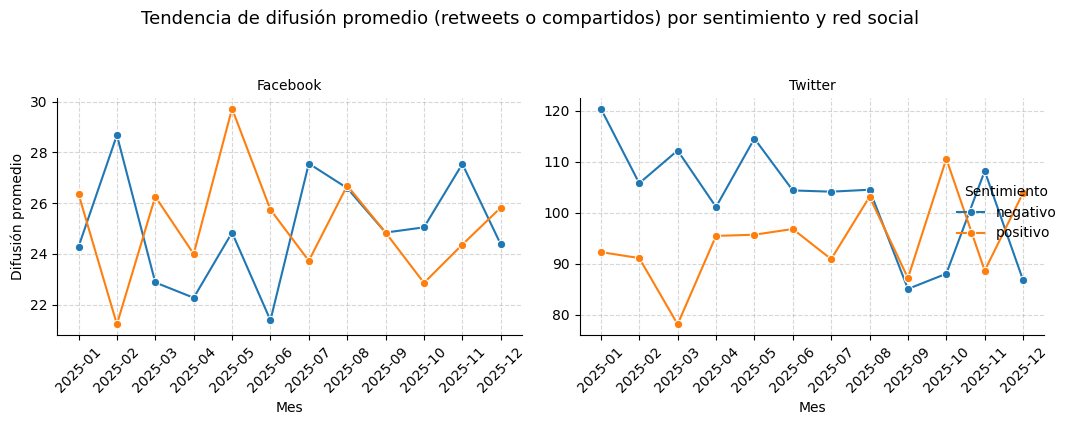

In [60]:
# Agrupar por plataforma, mes y sentimiento, calcular promedio de difusión
difusion_por_red_sentimiento = (
    df_redes.groupby(['plataforma', 'anio_mes', 'clasificacion'])['difusion']
    .mean()
    .dropna()
    .reset_index()
)

# Crear gráfico con paneles por red social
g = sns.FacetGrid(difusion_por_red_sentimiento, col='plataforma', hue='clasificacion', height=4, aspect=1.2, sharey=False)
g.map_dataframe(sns.lineplot, x='anio_mes', y='difusion', marker='o')
g.add_legend(title='Sentimiento')
g.set_titles("{col_name}")
g.set_axis_labels("Mes", "Difusión promedio")
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, linestyle='--', alpha=0.5)

plt.suptitle("Tendencia de difusión promedio (retweets o compartidos) por sentimiento y red social", y=1.05, fontsize=13)
plt.tight_layout()
plt.savefig('../Outputs/difusion_promedio_por_red_y_sentimiento.png', dpi=300)
plt.show()
